In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

In [2]:
#reading the data into a dataframe
df = pd.read_csv('star_classification.csv')
df.shape

(100000, 18)

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#checking the data fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
#checking the distribution of classes
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [6]:
#check for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
#Data cleaning
#removing info related and date columns
df.drop(columns=["obj_ID", "run_ID", "rerun_ID", "field_ID", "MJD", "fiber_ID"], axis=1, inplace=True)

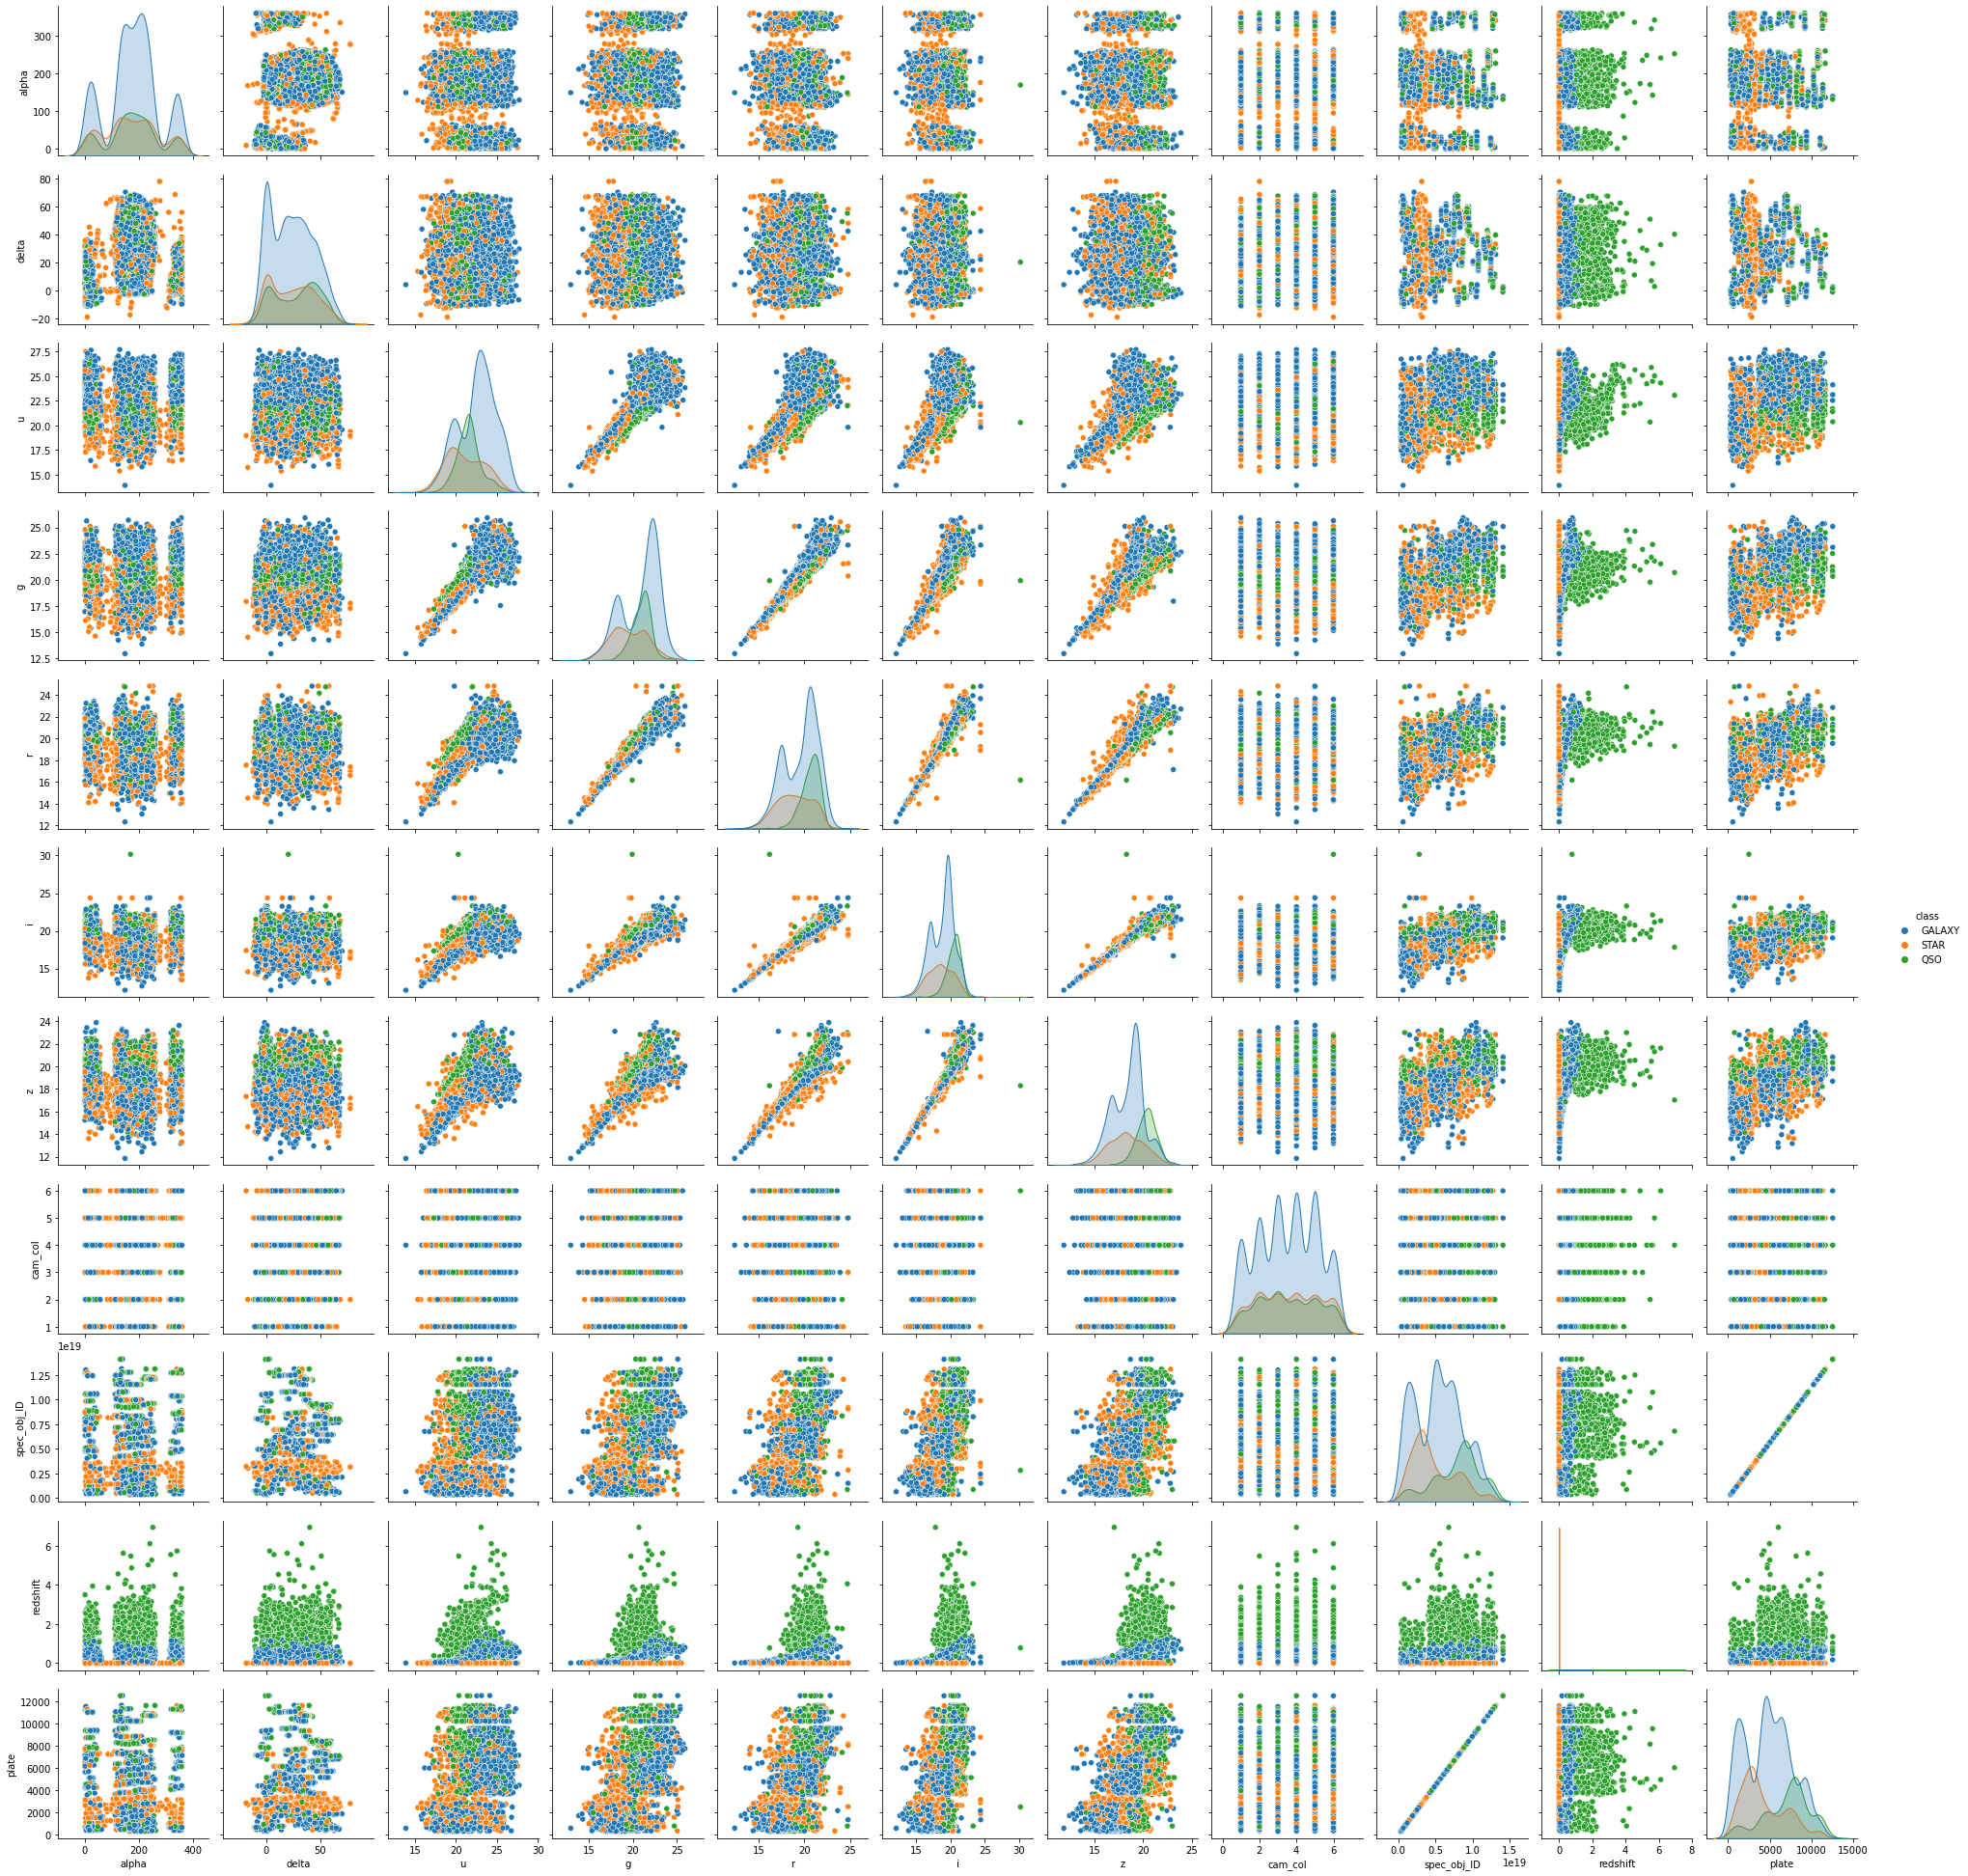

In [8]:
sns.pairplot(df.sample(frac=0.05),hue='class')

In [9]:
df.corr().style.background_gradient()

,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.019582,-0.002553,0.001667,-0.002554
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.032565,0.112329,0.031638,0.112329
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.003548,0.029997,0.014309,0.029997
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.003508,0.039443,0.022954,0.039443
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.008480,0.655245,0.433241,0.655243
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.007615,0.661641,0.492383,0.661640
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.003365,0.037813,0.030380,0.037813
cam_col,0.019582,0.032565,0.003548,0.003508,0.008480,0.007615,0.003365,1.000000,-0.001946,0.000097,-0.001949
spec_obj_ID,-0.002553,0.112329,0.029997,0.039443,0.655245,0.661641,0.037813,-0.001946,1.000000,0.388642,1.000000
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.000097,0.388642,1.000000,0.388641


<AxesSubplot:xlabel='class', ylabel='cam_col'>

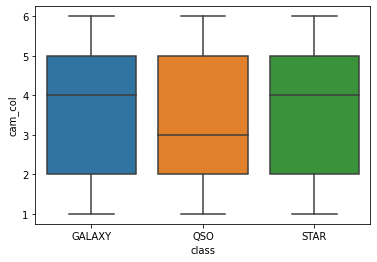

In [10]:
sns.boxplot(x=df["class"], y=df["cam_col"])

<AxesSubplot:xlabel='class', ylabel='spec_obj_ID'>

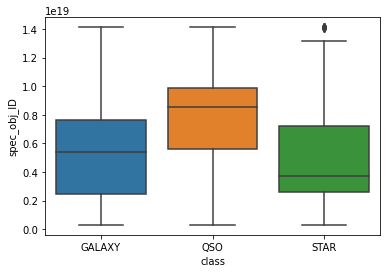

In [11]:
sns.boxplot(x=df["class"], y=df["spec_obj_ID"])

<AxesSubplot:xlabel='class', ylabel='plate'>

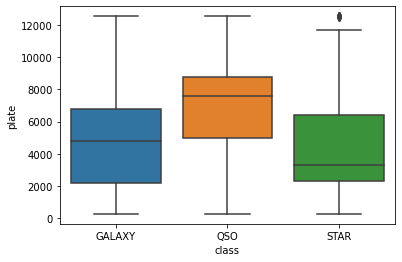

In [12]:
sns.boxplot(x=df["class"], y=df["plate"])

In [13]:
#Further cleaning
df.drop(columns=["cam_col"], axis=1, inplace=True)

In [14]:
X = df.drop(["class"], axis = 1)
Y = df["class"]

In [15]:
#Standardization of data
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [16]:
X_standardised = pd.DataFrame(scaled_features,columns=X.columns)
X_standardised.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,0.228609,0.079557,0.228633
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,1.797912,0.277096,1.797924
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.190037,0.092423,-0.190025
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,1.358962,0.486770,1.358942
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,0.333328,-0.630267,0.333297


In [17]:
#data split in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardised,Y,test_size=0.30)

In [18]:
#finding the optimum 'k' value
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

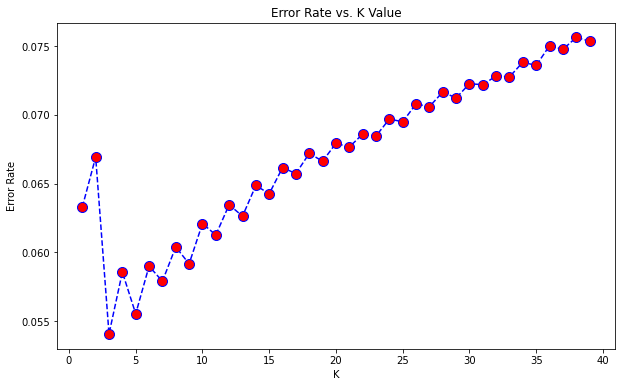

In [19]:
#plotting error v/s k to visualize the best performing k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [21]:
#Confusion Matrix for KNN
print(confusion_matrix(y_test,pred))

[[17241   223   412]
 [  527  5085    26]
 [  434     0  6052]]


<AxesSubplot:>

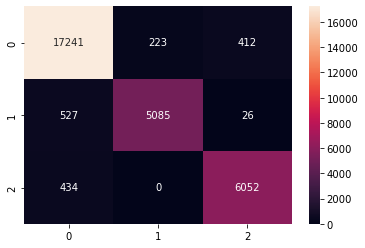

In [22]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='g')

In [23]:
#Accuracy scores for KNN
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      GALAXY       0.95      0.96      0.96     17876
         QSO       0.96      0.90      0.93      5638
        STAR       0.93      0.93      0.93      6486

    accuracy                           0.95     30000
   macro avg       0.95      0.93      0.94     30000
weighted avg       0.95      0.95      0.95     30000



In [24]:
#SVC Classifier
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [25]:
#confusion matrix for SVC
print(confusion_matrix(y_test,predictions))

[[17315   164   397]
 [  558  5074     6]
 [   42     0  6444]]


<AxesSubplot:>

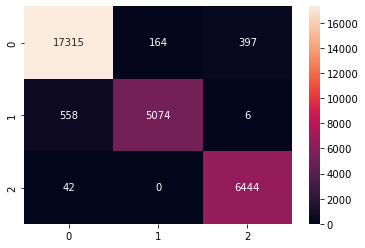

In [26]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

In [27]:
#Accuracy scores for SVC
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     17876
         QSO       0.97      0.90      0.93      5638
        STAR       0.94      0.99      0.97      6486

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.96     30000
weighted avg       0.96      0.96      0.96     30000

